# **Multilayer Perceptron**

**Import** **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data=pd.read_csv('data.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop([data.columns[32], data.columns[0]],axis=1,inplace=True)
data.rename(columns = {"diagnosis": "target"}, inplace = True)
data["target"] = [1 if i.strip() == 'M' else 0 for i in data["target"]]
data


,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
##these are the 30 features/variables
for i in range(31):
  print(data.columns[i])
print("Number of features: 30")

target
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Number of features: 30


0    357
1    212
Name: target, dtype: int64
Total: 569


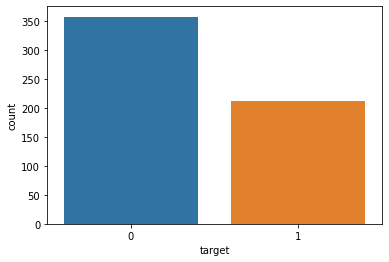

In [ ]:
##lets see the number of milgnant and benign tumor in the dataset
print(data["target"].value_counts())
print("Total:", len(data["target"]))
sns.countplot(x = data["target"])
##0 means benign and 1 means malignant
plt.show()

In [ ]:
count1=0
count2=0
for i in data['target']:
  if(i==0): 
    count1=count1+1
  else: 
    count2=count2+1
print("Number of malign tumors:"+ " "+str(count1))
print("Number of benign tumors:"+ " "+str(count2))

Number of malign tumors: 357
Number of benign tumors: 212


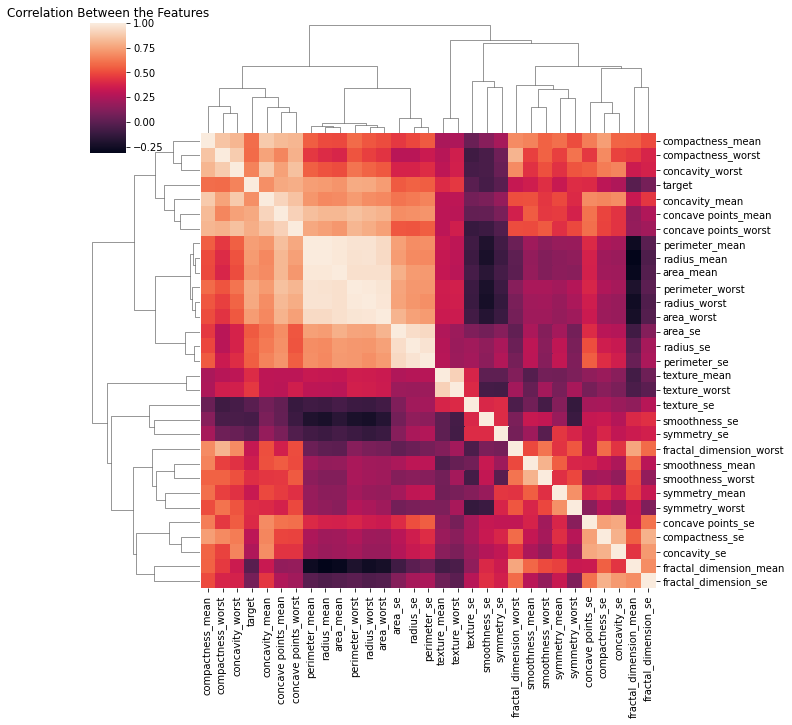

In [ ]:
corrMatrix = data.corr()

sns.clustermap(corrMatrix, annot = False)
plt.title("Correlation Between the Features")

plt.show()

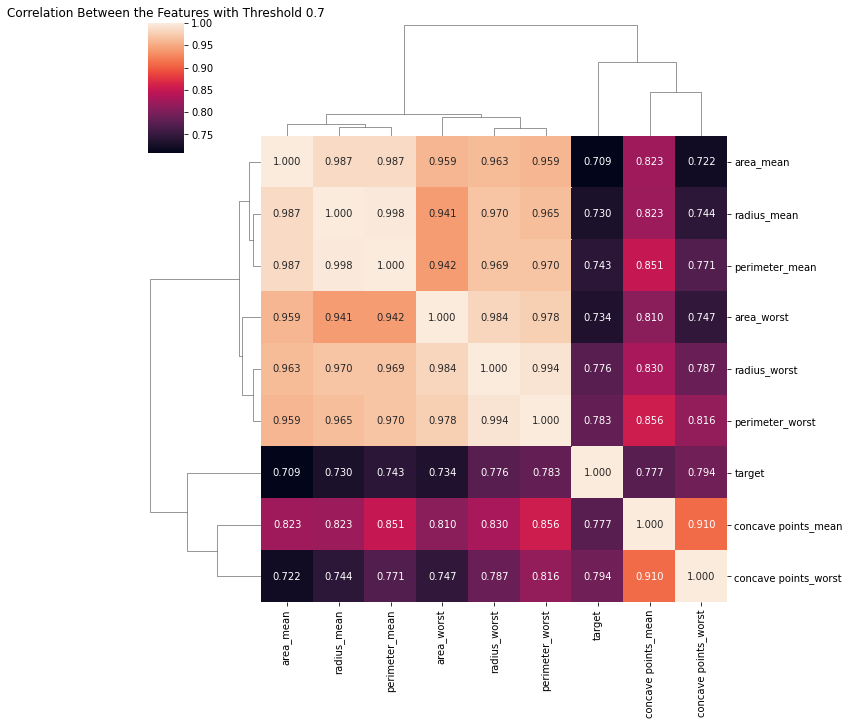

In [ ]:
# simplified correlation matrix

threshold = 0.7

filt = np.abs(corrMatrix["target"]) > threshold
corrFeatures = corrMatrix.columns[filt].tolist()

sns.clustermap(data[corrFeatures].corr(), annot = True, fmt = ".3f")
plt.title("Correlation Between the Features with Threshold 0.7")

plt.show()

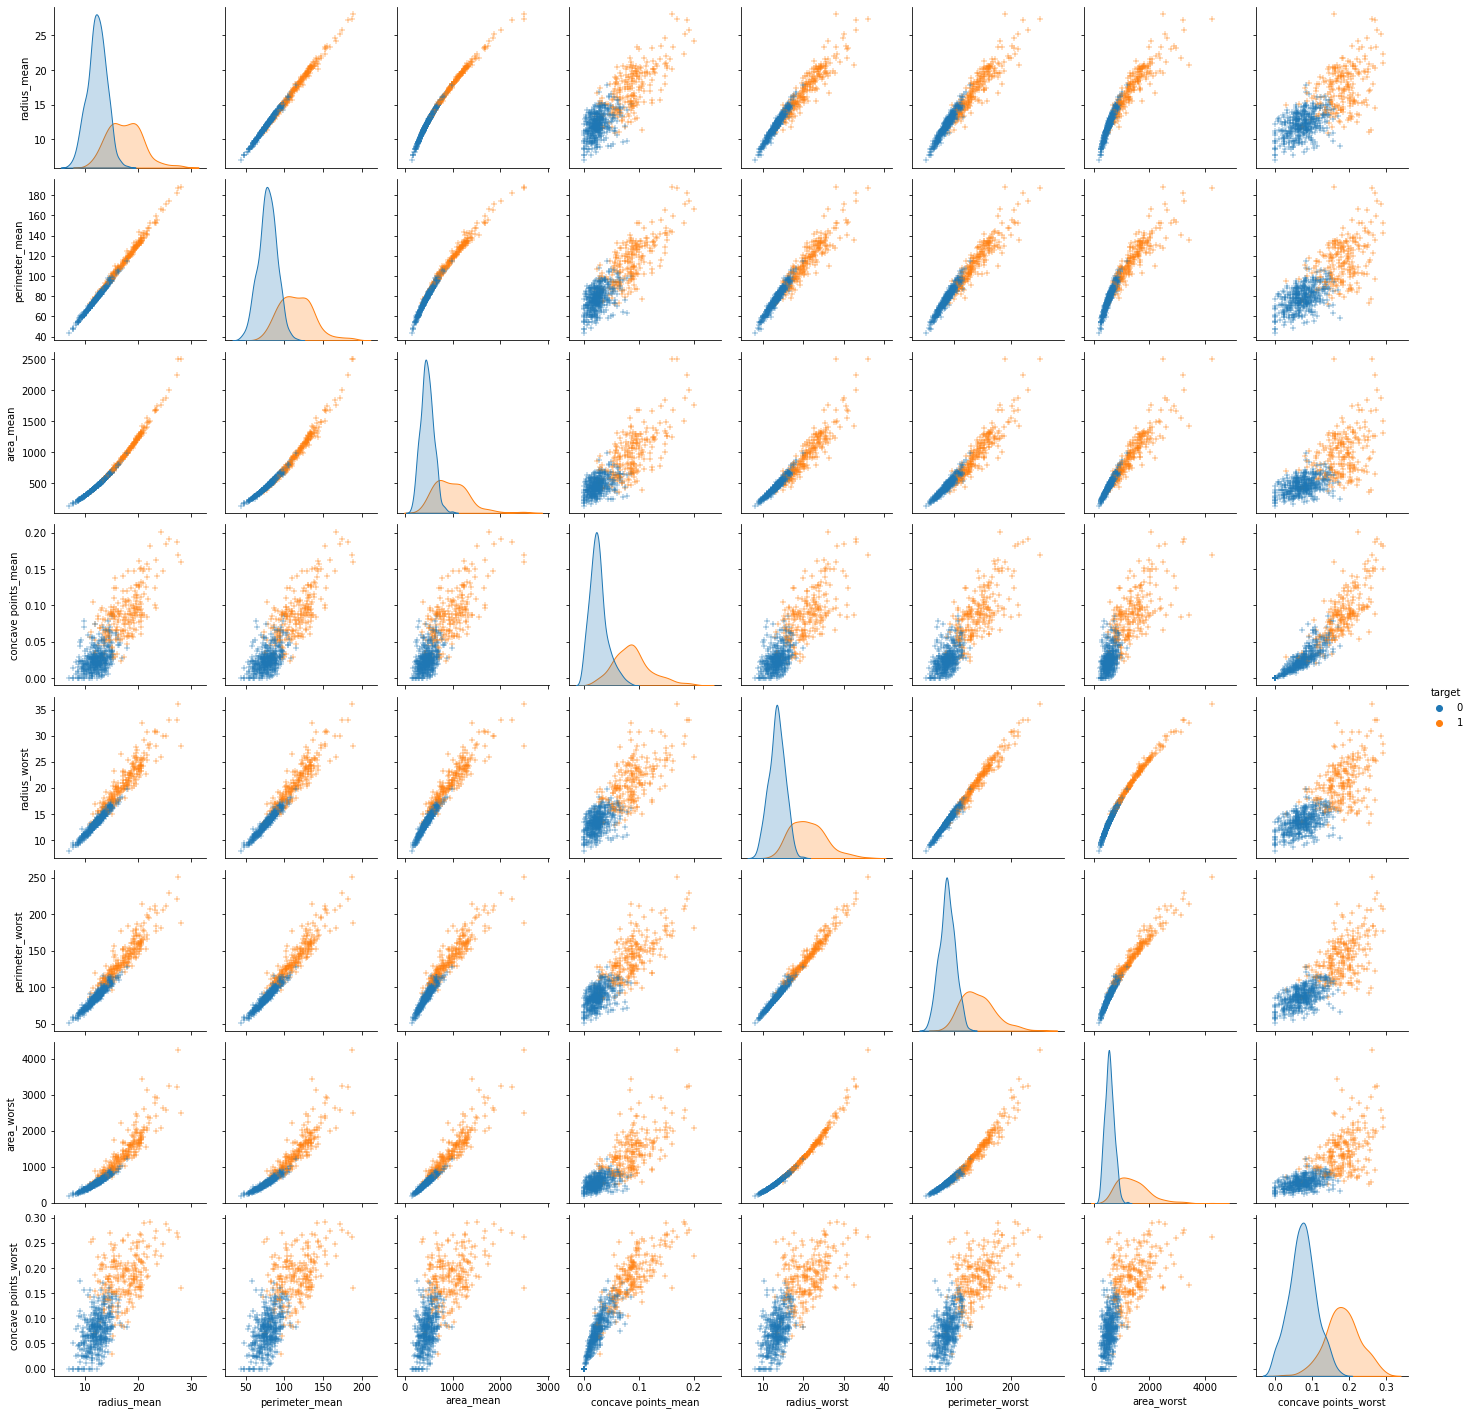

In [ ]:
###creating a pair plot with the above corelation matrix
sns.pairplot(data[corrFeatures], diag_kind = "kde", markers = '+', hue = "target")

plt.show()

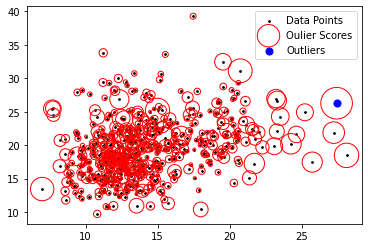

In [ ]:
# outlier detection
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
y = data["target"]
x = data.drop(["target"], axis = 1)

clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(x)
xScore = clf.negative_outlier_factor_

outlierScore = pd.DataFrame()
outlierScore["score"] = xScore

threshold = -2.5
filt = outlierScore["score"] < threshold
outlierIndex = outlierScore[filt].index.tolist()

radius = (xScore.max() - xScore) / (xScore.max() - xScore.min())
outlierScore["radius"] = radius


plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = 'k', s = 3, label = "Data Points")
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = 'r', facecolors = "none", label = "Oulier Scores")
plt.scatter(x.iloc[outlierIndex, 0], x.iloc[outlierIndex, 1], color = 'b', s = 50, label = "Outliers")
plt.legend()

plt.show()

In [ ]:
# drop outliers

x = x.drop(outlierIndex)
y = y.drop(outlierIndex).values

In [ ]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
# creat the train and test split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
# standardization
scaler = StandardScaler()
xTrain =  scaler.fit_transform(X_Train)
xTest = scaler.transform(X_Test)

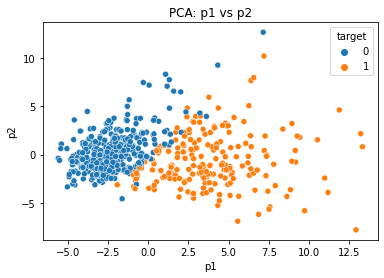

In [ ]:
#implementing PCA
from sklearn.decomposition import PCA
xScaled = scaler.fit_transform(x)
# dimension reduction with PCA

pca = PCA(n_components = 2)
xReducedPca = pca.fit_transform(xScaled)

pcaData = pd.DataFrame(xReducedPca, columns = ["p1", "p2"])
pcaData["target"] = y

sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pcaData)
plt.title("PCA: p1 vs p2")

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, top_k_accuracy_score, ConfusionMatrixDisplay, plot_roc_curve

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(max_iter=500, batch_size = 100, hidden_layer_sizes=(12,8), activation = 'logistic', alpha = 0.001)
classifier.fit(X_Train, Y_Train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size=100,
              hidden_layer_sizes=(12, 8), max_iter=500)

In [ ]:
y_pred = classifier.predict(X_Test)
y_pred.shape

(171,)

In [ ]:
accuracy = accuracy_score(Y_Test, y_pred)
print("The obtained accuracy =", accuracy*100, "%")

The obtained accuracy = 94.73684210526315 %


In [ ]:
classifier.get_params()

{'activation': 'logistic',
 'alpha': 0.001,
 'batch_size': 100,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (12, 8),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusionmat = confusion_matrix(Y_Test, y_pred)

print(confusionmat)

[[108   1]
 [  8  54]]


In [ ]:
target_names = ['0','1']
print(classification_report(Y_Test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       109
           1       0.98      0.87      0.92        62

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



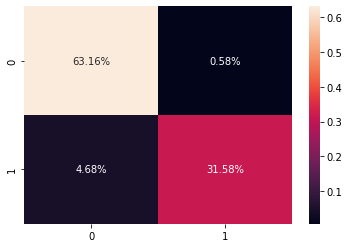

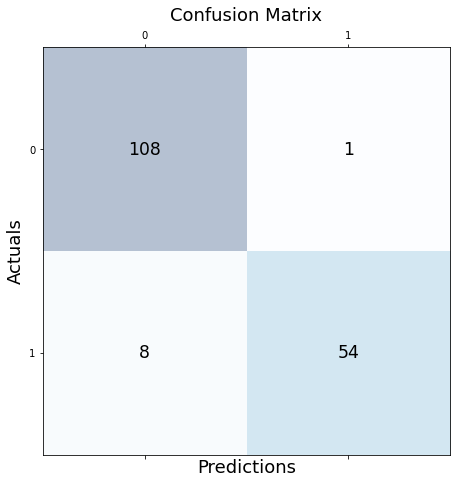

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


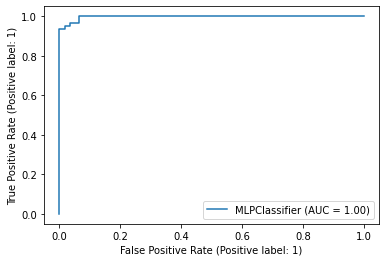

In [ ]:
sns.heatmap(confusionmat/np.sum(confusionmat), fmt = '.2%', annot = True)
confuse=confusion_matrix(Y_Test, y_pred)

##plotting the confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confuse, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confuse.shape[0]):
    for j in range(confuse.shape[1]):
        ax.text(x=j, y=i,s=confuse[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

plot_roc_curve(classifier, X_Test, Y_Test) 
plt.show()

In [ ]:
precision = confusionmat[0,0]/(confusionmat[0,0] + confusionmat[1,0])
recall = confusionmat[0,0]/(confusionmat[0,0] + confusionmat[0,1])
misrate = confusionmat[1,0] / (confusionmat[1,0] + confusionmat[0,0])

print("Precision = ", round(precision,2))
print("Recall = ", round(recall,2))
print("Miss Rate = ", round(misrate,2))

Precision =  0.93
Recall =  0.99
Miss Rate =  0.07


In [ ]:
f1_score = (2*precision * recall) / (precision + recall)
print("F1 Score = ", round(f1_score,2))

F1 Score =  0.96


In [ ]:
accuracy = accuracy_score(Y_Test, y_pred)
print("The obtained accuracy =", accuracy*100, "%")

The obtained accuracy = 94.73684210526315 %


In [ ]:
##miss rate is the ratio of FN/FN+TP
miss_rate=confuse[1][0] / (confuse[0][0] + confuse[1][0])
print("miss Rate is: "+ str(miss_rate))

miss Rate is: 0.06896551724137931
